In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras import Model
from matplotlib import pyplot as plt


np.set_printoptions(threshold=np.inf)


In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 38s 765us/sample - loss: 1.6807 - sparse_categorical_accuracy: 0.3906 - val_loss: 1.6605 - val_sparse_categorical_accuracy: 0.4225
Epoch 2/5
50000/50000 [==============================] - 37s 743us/sample - loss: 1.4584 - sparse_categorical_accuracy: 0.4741 - val_loss: 1.3618 - val_sparse_categorical_accuracy: 0.5092
Epoch 3/5
50000/50000 [==============================] - 38s 754us/sample - loss: 1.3693 - sparse_categorical_accuracy: 0.5074 - val_loss: 1.4194 - val_sparse_categorical_accuracy: 0.4967
Epoch 4/5
50000/50000 [==============================] - 38s 751us/sample - loss: 1.3104 - sparse_categorical_accuracy: 0.5303 - val_loss: 1.4663 - val_sparse_categorical_accuracy: 0.4929
Epoch 5/5
50000/50000 [==============================] - 38s 756us/sample - loss: 1.2663 - sparse_categorical_accuracy: 0.5446 - val_loss: 1.7573 - val_sparse_categorical_accuracy: 0.4379
Model: "ba

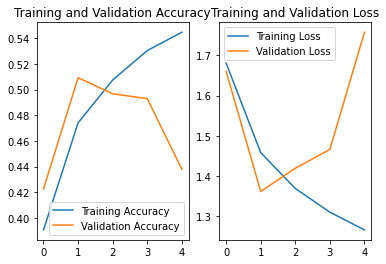

In [3]:
class Baseline(Model):
    def __init__(self):
        super(Baseline,self).__init__()
        self.c1 = Conv2D(filters=6,kernel_size=(5,5),padding="same")
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.p1 = MaxPool2D(pool_size=(2,2),strides=2,padding="same")
        self.d1 = Dropout(0.2)
        
        self.flatten = Flatten()
        self.f1 = Dense(128,activation='relu')
        self.d2 = Dropout(0.2)
        self.f2 = Dense(10,activation="softmax")
    # 注意这个call不带双下划线的
    def call(self,x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        x = self.d1(x)
        x = self.flatten(x)
        x = self.f1(x)
        x = self.d2(x)
        y = self.f2(x)
        return y
model = Baseline()
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])
checkpoint_path = "./checkpoint/Baseline.ckpt"
if os.path.exists(checkpoint_path + ".index"):
    print("----------load the model-----------")
    model.load_weights(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                save_weights_only=True,
                                                save_best_only=True)
history = model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_test,y_test),
                   validation_freq=1,callbacks=[cp_callback])
model.summary()
file = open('./weights.txt','w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()